# Trenujemy model regresji dla danych ubezpieczeniowych

In [1]:
from pycaret.regression import *
import pandas as pd

In [2]:
# Wczytanie danych do df
fuel_df = pd.read_csv('fuel_data.csv', sep=",")

In [3]:
# Wprowadzenie zmian w df
fuel_df.rename(columns={'CL=F':'ropa naftowa', 'PLN=X':'USD/PLN'}, inplace=True)
fuel_df = fuel_df.set_index('Date')

In [4]:
# Przygotowanie df do ML
diesel_df = fuel_df.drop(columns=['super95'])
super95_df = fuel_df.drop(columns=['diesel'])


In [5]:
diesel_df


,ropa naftowa,USD/PLN,diesel
Date,,,
2004-01-01,33.779999,3.725700,2165.0
2004-01-02,33.779999,3.735900,2165.0
2004-01-03,33.779999,3.735900,2165.0
2004-01-04,33.779999,3.735900,2165.0
2004-01-05,33.779999,3.683600,2165.0
...,...,...,...
2024-12-27,70.599998,4.088500,4867.0
2024-12-28,70.599998,4.088500,4879.0
2024-12-29,70.599998,4.088500,4879.0


In [6]:
diesel_df.dtypes

ropa naftowa    float64
USD/PLN         float64
diesel          float64
dtype: object

## Setup

In [7]:
# Przygotowanie danych do ML
exp = setup(data=diesel_df, target="diesel", session_id=123)

,Description,Value
0,Session id,123
1,Target,diesel
2,Target type,Regression
3,Original data shape,"(7671, 3)"
4,Transformed data shape,"(7671, 3)"
5,Transformed train set shape,"(5369, 3)"
6,Transformed test set shape,"(2302, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


## Compare Models

In [8]:
# Wybór najlepszego modelu
best_model = exp.compare_models(sort="R2", n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,81.5334,23954.2322,154.5883,0.9755,0.0445,0.0224,0.2510
rf,Random Forest Regressor,88.2228,24590.4542,156.6427,0.9748,0.0450,0.0242,0.4050
lightgbm,Light Gradient Boosting Machine,117.4960,30955.3171,175.8210,0.9683,0.0502,0.0323,0.0760
dt,Decision Tree Regressor,91.9723,36896.1082,191.5757,0.9621,0.0550,0.0251,0.0170
gbr,Gradient Boosting Regressor,147.5384,41758.1968,204.2988,0.9571,0.0586,0.0413,0.2610
knn,K Neighbors Regressor,156.4557,59076.3488,242.4819,0.9395,0.0660,0.0426,0.0180
lar,Least Angle Regression,227.2485,95159.0766,308.0085,0.9023,0.0918,0.0647,0.0120
br,Bayesian Ridge,227.2494,95159.0898,308.0085,0.9023,0.0918,0.0647,0.0150
llar,Lasso Least Angle Regression,227.2903,95163.8406,308.0145,0.9023,0.0917,0.0647,0.0120
ridge,Ridge Regression,227.2620,95159.6070,308.0088,0.9023,0.0917,0.0647,0.0130


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

## Evaluate Models

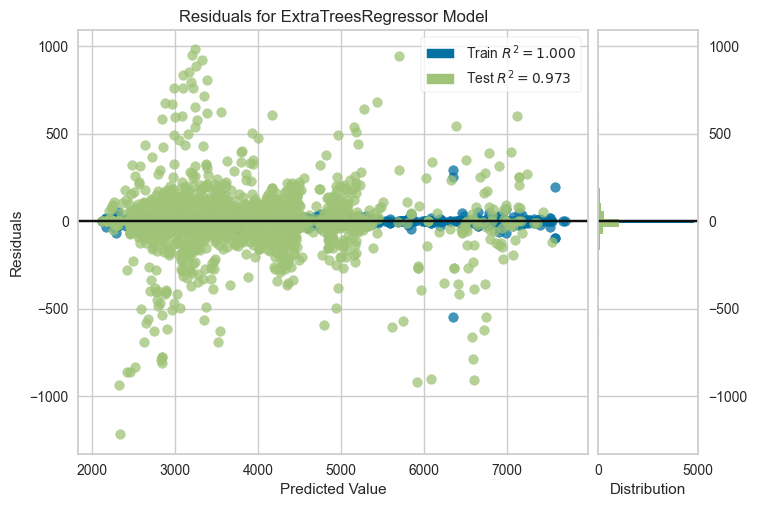

In [9]:
plot_model(best_model, plot='residuals')

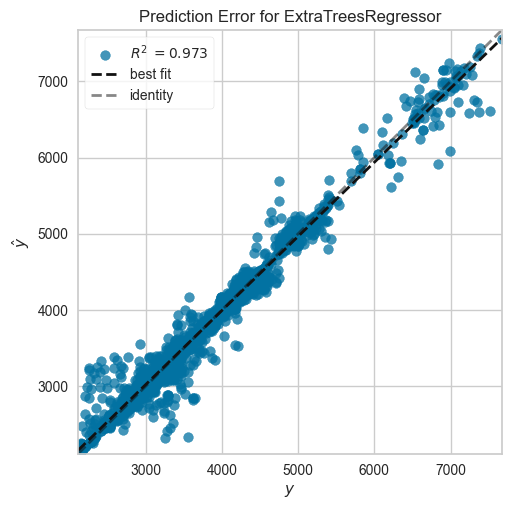

In [10]:
plot_model(best_model, plot='error')

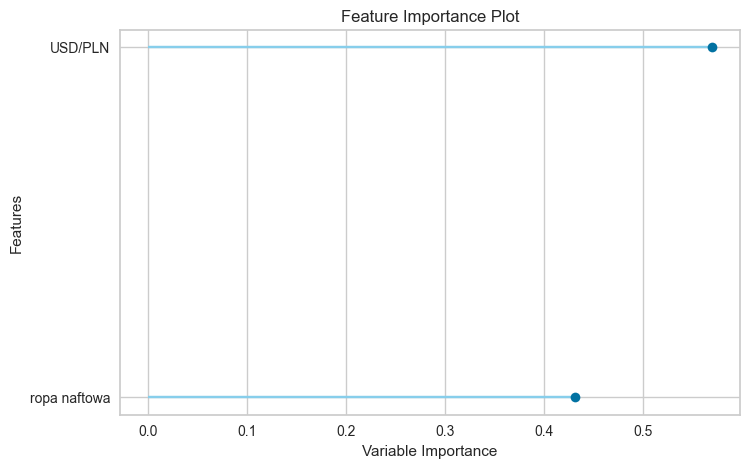

In [11]:
plot_model(best_model, plot='feature')

# Finalize Model and Save

In [12]:
# Finalizowanie najlepszego modelu (zrezygnowałem z tuningu, bo nic nie wnosił)
final_model = finalize_model(best_model)
save_model(final_model, 'diesel_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ropa naftowa', 'USD/PLN'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'diesel_model.pkl')

In [13]:
# Przygotowanie danych do ML dla super 95
exp95 = setup(data=super95_df, target="super95", session_id=123)

,Description,Value
0,Session id,123
1,Target,super95
2,Target type,Regression
3,Original data shape,"(7671, 3)"
4,Transformed data shape,"(7671, 3)"
5,Transformed train set shape,"(5369, 3)"
6,Transformed test set shape,"(2302, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [14]:
# Wybór najlepszego modelu dla super95
best_model95 = exp95.compare_models(sort="R2", n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,75.2726,17456.0606,131.9605,0.9740,0.0350,0.0199,0.2490
rf,Random Forest Regressor,83.7518,19585.9533,139.7631,0.9709,0.0368,0.0222,0.4150
lightgbm,Light Gradient Boosting Machine,109.1605,24171.7108,155.2431,0.9640,0.0410,0.0290,0.0710
dt,Decision Tree Regressor,87.9460,27871.9366,166.7260,0.9584,0.0438,0.0232,0.0180
gbr,Gradient Boosting Regressor,129.2521,29427.1410,171.4343,0.9561,0.0454,0.0344,0.1590
knn,K Neighbors Regressor,141.5073,41182.1520,202.6480,0.9387,0.0522,0.0372,0.0170
lar,Least Angle Regression,189.6259,62835.1801,250.5065,0.9063,0.0684,0.0511,0.0140
br,Bayesian Ridge,189.6254,62835.1984,250.5065,0.9063,0.0684,0.0511,0.0130
llar,Lasso Least Angle Regression,189.6036,62839.9074,250.5167,0.9063,0.0684,0.0511,0.0130
ridge,Ridge Regression,189.6196,62835.5969,250.5075,0.9063,0.0684,0.0511,0.0120


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

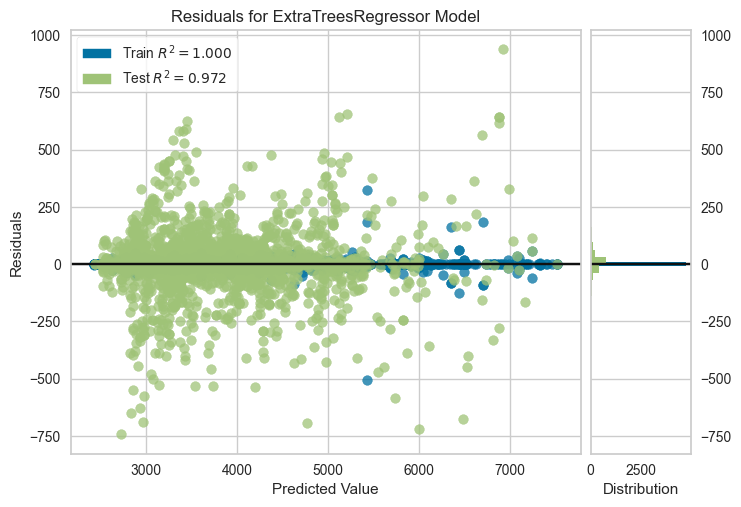

In [15]:
plot_model(best_model95, plot='residuals')

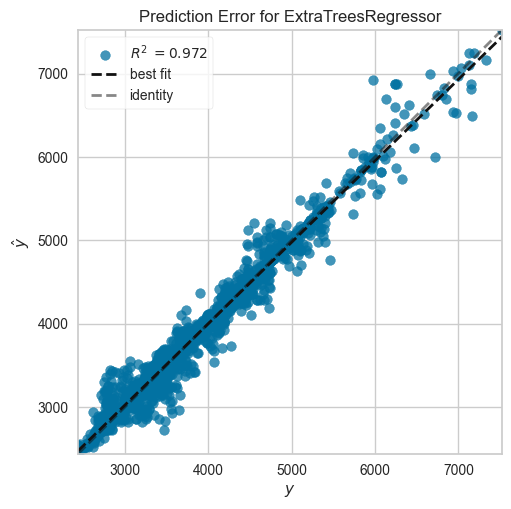

In [16]:
plot_model(best_model95, plot='error')

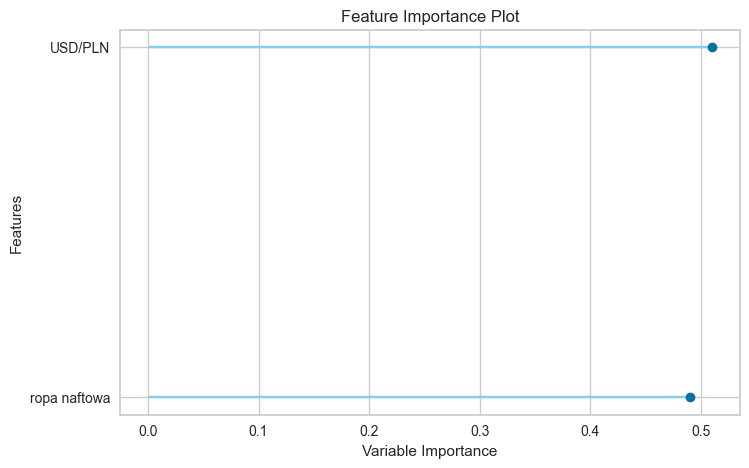

In [17]:
plot_model(best_model95, plot='feature')

In [18]:
# Finalizowanie modelu z nagraniem pliku (bez tuningu, z powodu j.w.)
final_model95 = finalize_model(best_model95)
save_model(final_model95, 'super95_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ropa naftowa', 'USD/PLN'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'super95_model.pkl')

In [28]:
# Przygotowanie df bez cen paliw, do predykcji
prediction_df = fuel_df.drop(columns=['super95', 'diesel'])


In [32]:
# Przygotowanie predykcji dla obu rodzajów paliwa
diesel = predict_model(final_model,prediction_df)
super95 = predict_model(final_model95,prediction_df)


In [37]:
# Dodanie kolumn z predykcjami do głównego df
fuel_df['diesel predykcja'] = diesel['prediction_label']
fuel_df['super95 predykcja'] = super95['prediction_label']
fuel_df

,ropa naftowa,USD/PLN,diesel,super95,super95 predykcja,diesel predykcja
Date,,,,,,
2004-01-01,33.779999,3.725700,2165.0,2533.0,2533.0,2165.0
2004-01-02,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-03,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-04,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-05,33.779999,3.683600,2165.0,2533.0,2533.0,2165.0
...,...,...,...,...,...,...
2024-12-27,70.599998,4.088500,4867.0,4674.0,4686.0,4875.0
2024-12-28,70.599998,4.088500,4879.0,4692.0,4686.0,4875.0
2024-12-29,70.599998,4.088500,4879.0,4692.0,4686.0,4875.0


In [38]:
fuel_df

,ropa naftowa,USD/PLN,diesel,super95,super95 predykcja,diesel predykcja
Date,,,,,,
2004-01-01,33.779999,3.725700,2165.0,2533.0,2533.0,2165.0
2004-01-02,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-03,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-04,33.779999,3.735900,2165.0,2533.0,2533.0,2165.0
2004-01-05,33.779999,3.683600,2165.0,2533.0,2533.0,2165.0
...,...,...,...,...,...,...
2024-12-27,70.599998,4.088500,4867.0,4674.0,4686.0,4875.0
2024-12-28,70.599998,4.088500,4879.0,4692.0,4686.0,4875.0
2024-12-29,70.599998,4.088500,4879.0,4692.0,4686.0,4875.0


In [39]:
fuel_df.to_csv('fuel_prediction.csv', sep=";", index=True)